In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/val'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [4]:

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [9]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [11]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1504 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 18 images belonging to 4 classes.


In [15]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
47/47 [==============================] - 507s 10s/step - loss: 2.4120 - accuracy: 0.7354 - val_loss: 0.3252 - val_accuracy: 0.8889
Epoch 2/20
47/47 [==============================] - 26s 559ms/step - loss: 0.7531 - accuracy: 0.8810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 3/20
47/47 [==============================] - 26s 560ms/step - loss: 0.5514 - accuracy: 0.9156 - val_loss: 0.7890 - val_accuracy: 0.8889
Epoch 4/20
47/47 [==============================] - 26s 560ms/step - loss: 0.7358 - accuracy: 0.9016 - val_loss: 0.5165 - val_accuracy: 0.8333
Epoch 5/20
47/47 [==============================] - 26s 555ms/step - loss: 0.6168 - accuracy: 0.9109 - val_loss: 0.3079 - val_accuracy: 0.9444
Epoch 6/20
47/47 [==============================] - 26s 551ms/step - loss: 0.4903 - accuracy: 0.9262 - val_loss: 0.7732 - val_accuracy: 0.7778
Epoch 7/20
47/47 [==============================] - 26s 555ms/step - loss: 0.4340 - accuracy: 0.9362 - val_loss: 0.0063 - val_accuracy: 1.0000


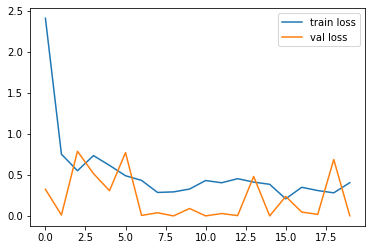

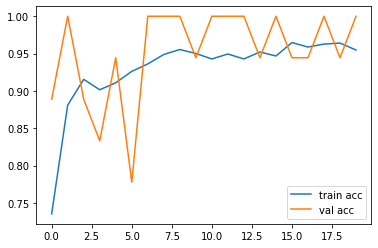

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model2.h5')

In [ ]:
#import pickle
#pickle.dump(r, open('model.pkl','wb'))